### <span style="color:orange">12.1 Preprocessing Images.</span>

#### <span style="color:orange">Importing the Libraries.</span>

In [1]:
## for google colab
# !pip install keras==3.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use("TkAgg")

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D

import random

## New
import pickle  # // to unpickle pickled files
import pandas as pd

#### <span style="color:orange">Loading/Opening the files</span>

In [3]:
np.random.seed(0)

with open('traffic-signs/train.p', 'rb') as file:
    train_data_file = pickle.load(file)

with open('traffic-signs/test.p', 'rb') as file:
    test_data_file = pickle.load(file)

with open("traffic-signs/valid.p", "rb") as file:
    validation_data_file = pickle.load(file)

print(type(train_data_file) )

## X_train, y_train, ...
train_images, train_labels = train_data_file["features"], train_data_file["labels"]
test_images, test_labels = test_data_file["features"], test_data_file["labels"]
validation_images, validation_labels = validation_data_file["features"],                                                                  validation_data_file["labels"]

<class 'dict'>


#### <span style="color:orange">Dataset Parameters.</span>

In [4]:
print(train_images.shape)
print(test_images.shape)
print(validation_images.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [5]:
print(train_labels.shape)

(34799,)


#### <span style="color:orange">assert method.</span>

In [6]:
assert (train_images.shape[0] == train_labels.shape[0] ),\
    "The number of images is not equal to the number of labels"
assert (validation_images.shape[0] == validation_labels.shape[0]), \
    "The number of images is not equal to the number of labels"
assert (test_images.shape[0] == test_labels.shape[0]),\
    "The number of images is not equal to the number of labels"

assert (train_images.shape[1:] == (32, 32, 3) ),\
    "The dimensions of the images are not 32 x 32 x 3"
assert (validation_images.shape[1:] == (32, 32, 3) ),\
    "The dimensions of the images are not 32 x 32 x 3"
assert (test_images.shape[1:] == (32, 32, 3) ),\
    "The dimensions of the images are not 32 x 32 x 3"

#### <span style="color:orange">Using Pandas Library to read the csv file.</span>

In [7]:
dataset = pd.read_csv('traffic-signs/signnames.csv')

print("Dataset = \n", dataset)

Dataset = 
     ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                

#### <span style="color:orange">Plotting Samples of the Traffic data (from (10.1) MNIST for clarification).</span>

C:\Users\hp\AppData\Local\Temp\ipykernel_12036\2515904116.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


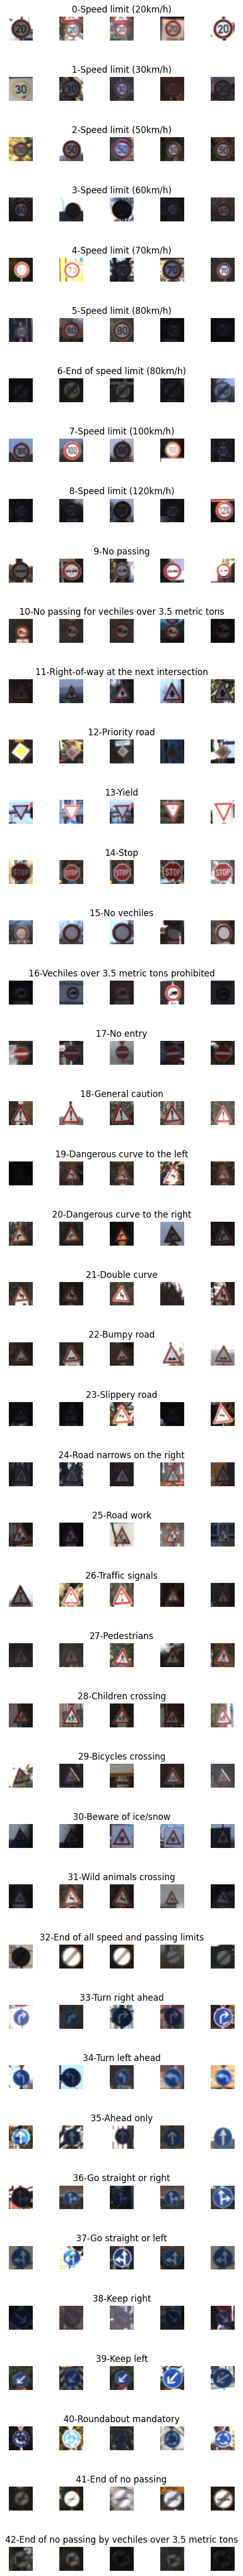

In [8]:
number_of_samples = []
number_of_classes = 43
cols = 5

fig, axes = plt.subplots(nrows=number_of_classes, ncols=cols, figsize=(5, 50),
                         layout='constrained')
# // figsize is the size of each grid (subplot), first the width then the height\

# fig.subplots_adjust( left=None, bottom=None,  right=None, top=None, wspace=None, hspace=None)

fig.tight_layout()
# // this is used to automatically deal with overlapping and separates the figures/subplots better

for col in range(cols): # // each col of the 5
    for r_index, row_info in dataset.iterrows(): # // each row(class) of the 10
        image_selected = train_images[train_labels == r_index]

        axes[r_index][col].imshow(image_selected[random.randint(0, (len(image_selected) - 1) ), : , : ],
                          cmap=plt.get_cmap("gray") )
        axes[r_index][col].axis("off")

        if col == 2:
            axes[r_index][col].set_title(str(r_index) + "-" + row_info["SignName"])

            number_of_samples.append(len(image_selected) )

#### <span style="color:orange">Bar plot to show the number of images each Class has.</span>

In [9]:
print(number_of_samples)

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


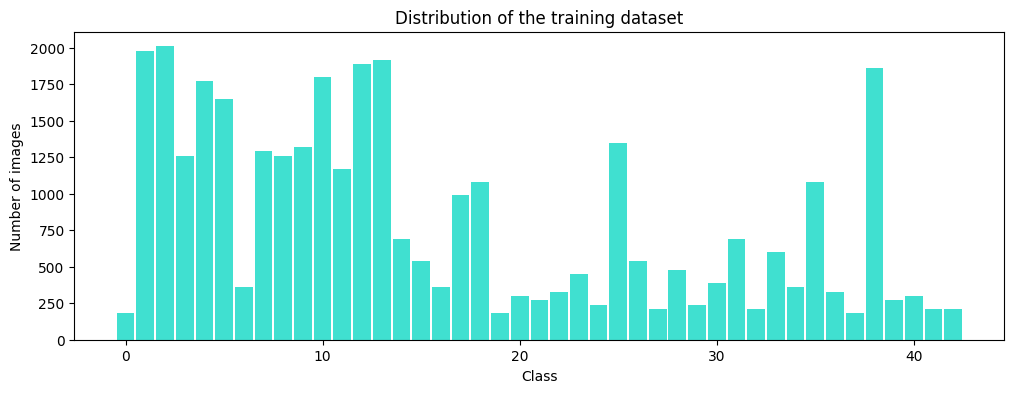

In [10]:
plt.figure(figsize=(12, 4) )
plt.bar(range(0, number_of_classes), number_of_samples, color="turquoise", width=0.9)
plt.title('Distribution of the training dataset')
plt.xlabel('Class')
plt.ylabel('Number of images')

plt.show()

#### <span style="color:orange">Preprocessing the images.</span>

**We will focus on a random photo then apply the same to the rest.**

In [11]:
import cv2

In [12]:
# random_image = cv2.imread(train_images[1000] )
# cv2.imshow("Random Image", random_image)
# cv2.waitKey(0)

**Error: Expected 'filename' to be a str or path-like object**

**That's why we will use plt.imshow() instead**

Image shape: (32, 32, 3)
Label of the pic: 36


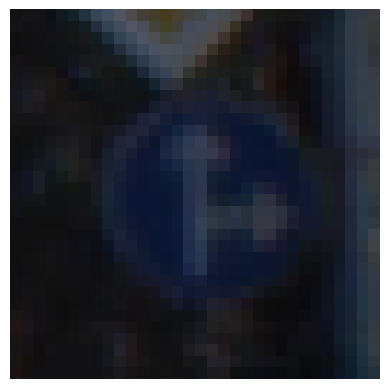

In [13]:
plt.imshow(train_images[1000])
plt.axis('off')
print("Image shape:", train_images[1000].shape)
print("Label of the pic:" , train_labels[1000] )

##### <span style="color:orange">1. grayscale</span>

In [14]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

Image shape: (32, 32)


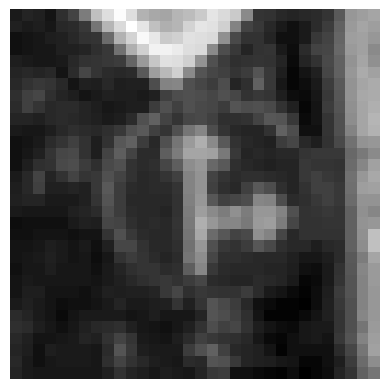

In [15]:
random_image = grayscale(train_images[1000] )

plt.imshow(random_image, cmap=plt.get_cmap("gray") )
plt.axis('off')
print("Image shape:", random_image.shape)

##### <span style="color:orange">2. Histogram Equalization</span>

In [16]:
def histogram_equalize(img):
    cv2.equalizeHist(img)
    return img

(32, 32)


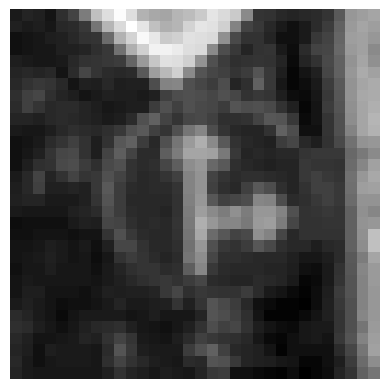

In [17]:
random_image = histogram_equalize(random_image)
plt.imshow(random_image, cmap=plt.get_cmap('gray'))
plt.axis('off')
print(random_image.shape)

##### <span style="color:orange">3. Normalization</span>

In [18]:
def preprocessing_image(img):
    img = grayscale(img)
    img = histogram_equalize(img)
    img = img / 255
    return img

In [19]:
train_images_preprocessed = np.array(list(map(preprocessing_image, train_images) ) )
validation_images_preprocessed = np.array(list(map(preprocessing_image, validation_images) ) )
test_images_preprocessed = np.array(list(map(preprocessing_image, test_images) ) )

(-0.5, 31.5, 31.5, -0.5)

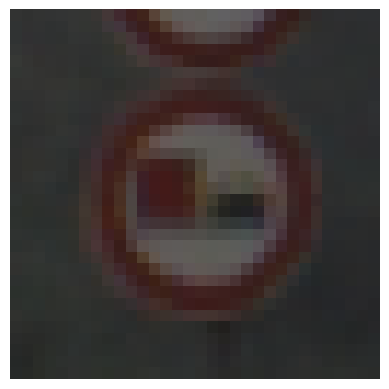

In [20]:
random_index = random.randint(0, len(train_images) - 1)

random_image = plt.imshow(train_images[random_index] )
plt.axis('off')

train images preprocessed shape:  (34799, 32, 32)


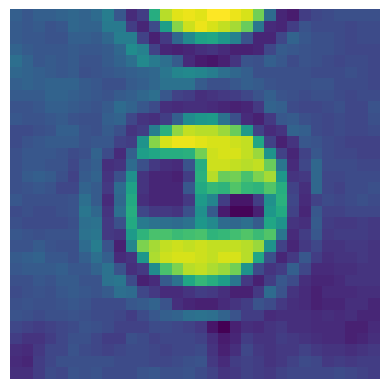

In [21]:
random_image_preprocessed = plt.imshow(train_images_preprocessed[random_index] )
plt.axis('off')
print("train images preprocessed shape: ", train_images_preprocessed.shape)

##### <span style="color:orange">4. Reshaping</span>

In [22]:
train_images_preprocessed = train_images_preprocessed.reshape(34799, 32, 32, 1)
test_images_preprocessed = test_images_preprocessed.reshape(12630, 32, 32, 1)
validation_images_preprocessed = validation_images_preprocessed.reshape(4410, 32, 32, 1)

##### <span style="color:orange">5. One Hot Encoding</span>

In [23]:
train_labels = to_categorical(train_labels, num_classes=43)
test_labels = to_categorical(test_labels, num_classes=43)
validation_labels = to_categorical(validation_labels, num_classes=43)

___

### <span style="color:orange">12.2 LeNet Architecture Implementation</span>

##### <span style="color:orange">LeNet model Architecture and Compilation</span>

In [24]:
def leNet_modified_model():
    model = Sequential()
    ## Conv layers
    model.add(Conv2D(input_shape=(32, 32, 1) , filters=60, kernel_size=(5, 5), strides=1,
                     activation="relu") )
    model.add(Conv2D(filters=60, kernel_size=(5, 5), strides=1,
                     activation="relu") )
    ## Pooling Layer
    model.add(MaxPooling2D(pool_size=(2, 2) ) )
    ## Conv layer
    model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu') )
    model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu') )
    ## Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2) ) )
    ## Another Dropout layer
    model.add(Dropout(rate=0.5) )
    ## Flatten layer
    model.add(Flatten() )
    ## DNN layers/ hidden layers
    model.add(Dense(units=500, activation="relu") )
    ## Dropout layer
    model.add(Dropout(rate=0.5) )
    ## Output layer (classification)
    model.add(Dense(units=number_of_classes, activation="softmax") )


    ## Compilation
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
                  metrics=['accuracy'] )

    return model

In [25]:
nn_model = leNet_modified_model()

print(nn_model.summary() )

D:\coding projects\PyCharm projects\new projects\S-D-C-2\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 60)        │      1,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 60)        │     90,060 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 60)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 30)        │     16,230 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 30)          │      8,130 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 30)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 30)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 480)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 500)               │    240,500 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 500)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 43)                │     21,543 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


****All parameters are described in the NB**

##### <span style="color:orange">Fitting the Model</span>

In [26]:
nn_model_fit = nn_model.fit(x=train_images_preprocessed, y=train_labels,
                                validation_data=(validation_images_preprocessed, validation_labels),
                                epochs=12, batch_size=400, verbose=True, shuffle=True)

Epoch 1/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 76s 856ms/step - accuracy: 0.1119 - loss: 3.3775 - val_accuracy: 0.7277 - val_loss: 1.1100
Epoch 2/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 79s 906ms/step - accuracy: 0.6799 - loss: 1.0899 - val_accuracy: 0.8878 - val_loss: 0.3703
Epoch 3/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 77s 890ms/step - accuracy: 0.8425 - loss: 0.5346 - val_accuracy: 0.9401 - val_loss: 0.2138
Epoch 4/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 82s 946ms/step - accuracy: 0.8957 - loss: 0.3451 - val_accuracy: 0.9501 - val_loss: 0.1701
Epoch 5/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 82s 941ms/step - accuracy: 0.9171 - loss: 0.2810 - val_accuracy: 0.9519 - val_loss: 0.1410
Epoch 6/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 82s 938ms/step - accuracy: 0.9327 - loss: 0.2233 - val_accuracy: 0.9594 - val_loss: 0.1207
Epoch 7/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 83s 956ms/step - accuracy: 0.9439 - loss: 0.1865 - val_accuracy: 0.9635 - val_loss: 0.1156
Epoch 8/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 83s 954ms/step - accuracy: 0.9446 - loss: 0.1781 - val_accu

##### <span style="color:orange">Saving/Loading the model.</span>

In [27]:
from keras.models import load_model

# // creates a HDF5 file nn_model.save('my_model.h5')  # / the hdf5 is wrong(old way)

# // creates a keras file (new way of saving)
nn_model.save('12.3.CNN_model_traffic_signs_enhanced.keras')

# // deletes the existing model
# del nn_model

# // returns a compiled model
nn_model = load_model('12.3.CNN_model_traffic_signs_enhanced.keras')

#### <span style="color:orange">Plotting model info</span>

##### <span style="color:orange">Accuracy plot</span>

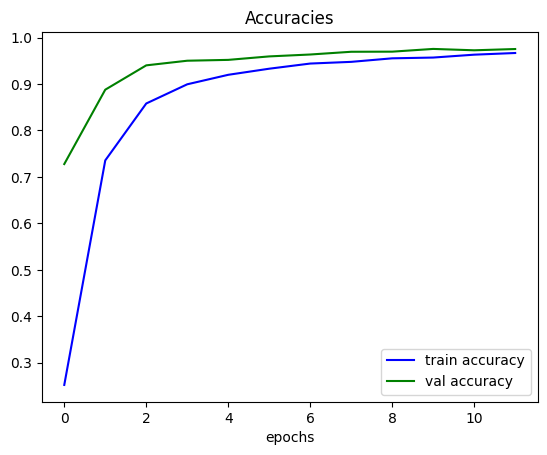

In [28]:
plt.plot(nn_model_fit.history['accuracy'], label= "train accuracy", color="blue" )
plt.plot(nn_model_fit.history['val_accuracy'], label="val accuracy", color="green" )

plt.xlabel('epochs')
# plt.legend(['accuracy'] )
plt.legend()
plt.title('Accuracies')
plt.show()

##### <span style="color:orange">Loss plot</span>

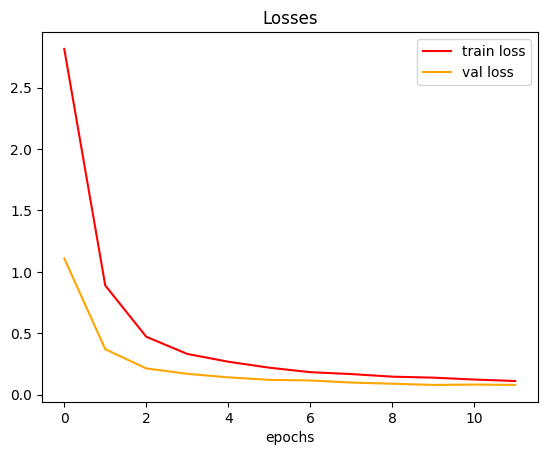

In [29]:
loss_plot = plt.plot(nn_model_fit.history['loss'], label = 'train loss', color = "red" )
val_loss_plot = plt.plot(nn_model_fit.history['val_loss'], label='val loss', color = "orange")

plt.xlabel('epochs')
# plt.legend(['loss'] )
plt.legend()
plt.title('Losses')
plt.show()

#### <span style="color:orange">Evaluating the Model</span>

In [30]:
nn_model_score = nn_model.evaluate(test_images_preprocessed, test_labels, verbose=0)

print("Test score: ", nn_model_score[0] * 100 , "%")
print("Test accuracy: ", nn_model_score[1] * 100 , "%")

Test score:  15.497177839279175 %
Test accuracy:  96.31829261779785 %


___

### <span style="color:orange">12.3 Fine-Tuning the Model</span>

**1. accuracy wasn't as good as we wanted**


**2. overfitting of the data**

#### <span style="color:orange">Combating the first issue</span>

**1. changed learning_rate from 0.01 to 0.001**

**2. Increasing the number of filters in the Conv layers**

**3. Increasing Conv layers**

#### <span style="color:orange">Combating the second issue</span>

**1. Increasing the number of Dropout layers**

___